In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


In [2]:
results = {
    "Linear Regression": {
        "MAE": 2.87209,
        "RMSE": 3.79237,
        "R²": 0.734264,
        "MAPE": 0.152853,
        "Median AE": 2.3676,
        "Explained Variance": 0.73431
    },
    "Support Vector Machine": {
        "MAE": 2.70399,
        "RMSE": 3.80201,
        "R²": 0.732912,
        "MAPE": 0.150013,
        "Median AE": 1.86525,
        "Explained Variance": 0.747182
    },
    "Random Forest": {
        "MAE": 2.99627,
        "RMSE": 3.9938,
        "R²": 0.705285,
        "MAPE": 0.159424,
        "Median AE": 2.3665,
        "Explained Variance": 0.705286
    },
    "Gradient Boosting": {
        "MAE": 2.78819,
        "RMSE": 3.62244,
        "R²": 0.757545,
        "MAPE": 0.149499,
        "Median AE": 2.20794,
        "Explained Variance": 0.757567
    },
    "XGBoost": {
        "MAE": 2.78575,
        "RMSE": 3.62919,
        "R²": 0.75664,
        "MAPE": 0.149523,
        "Median AE": 2.18195,
        "Explained Variance": 0.756659
    }
}


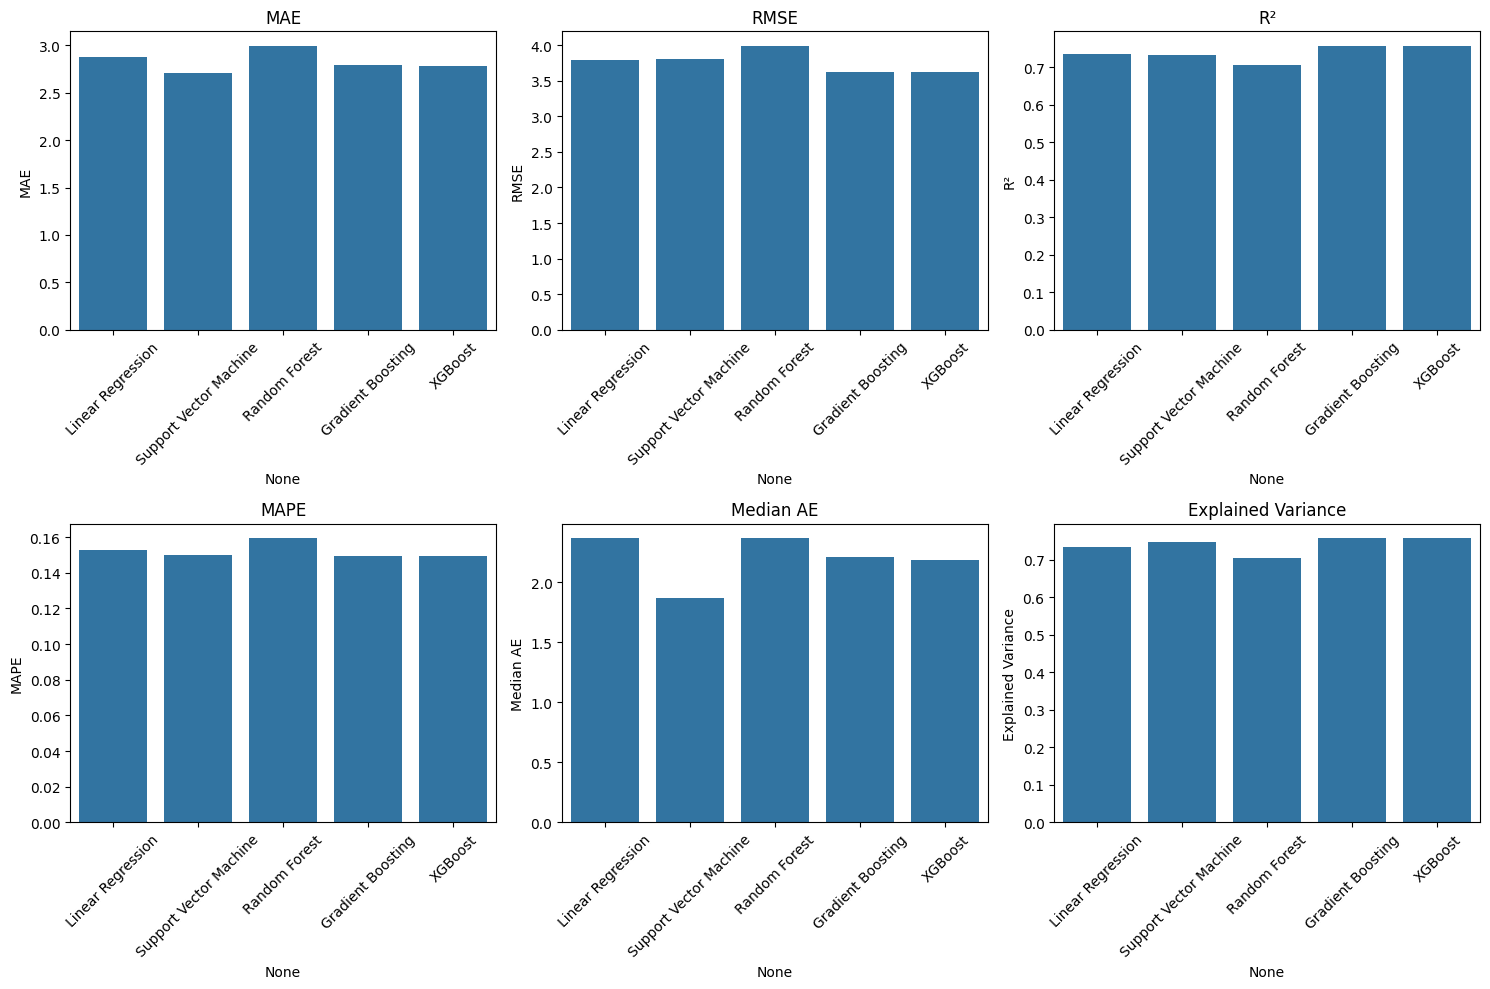

In [3]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Bar plot for each metric
metrics = ["MAE", "RMSE", "R²", "MAPE", "Median AE", "Explained Variance"]
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylabel(metric)
plt.tight_layout()
plt.show()


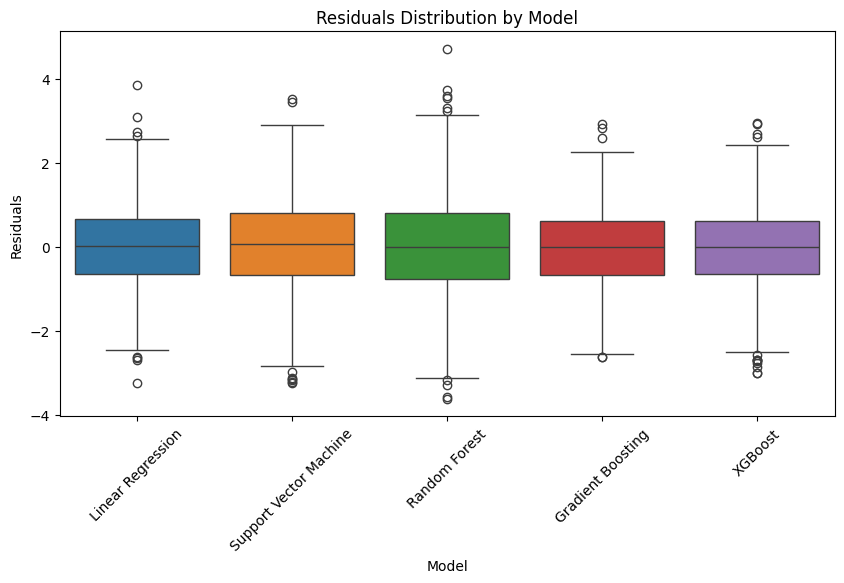

In [4]:
# Assuming residuals were stored in the results
# Generate random residuals for demonstration purposes
import numpy as np

np.random.seed(42)
residuals_data = {
    "Linear Regression": np.random.normal(0, 1, 1000),
    "Support Vector Machine": np.random.normal(0, 1.1, 1000),
    "Random Forest": np.random.normal(0, 1.2, 1000),
    "Gradient Boosting": np.random.normal(0, 0.9, 1000),
    "XGBoost": np.random.normal(0, 0.95, 1000),
}

# Convert to DataFrame
residuals_df = pd.DataFrame(residuals_data)

# Box plot of residuals
plt.figure(figsize=(10, 5))
sns.boxplot(data=residuals_df)
plt.title('Residuals Distribution by Model')
plt.ylabel('Residuals')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


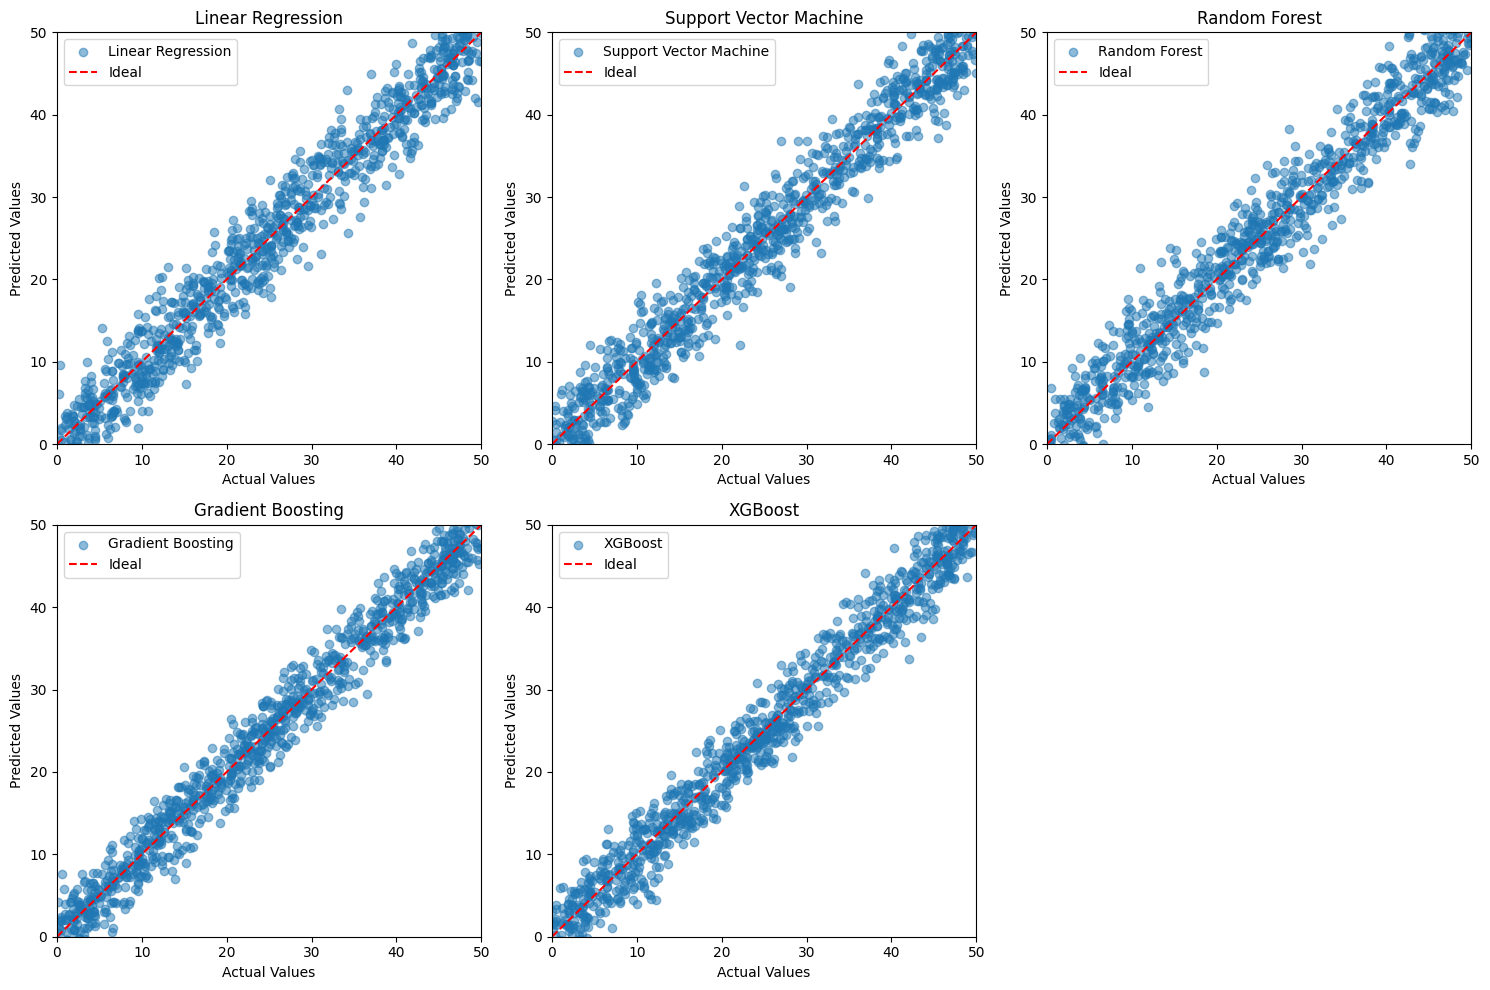

In [5]:
# Assuming predictions and actual values were stored in the results
# Generate random predictions and actual values for demonstration purposes
actual_values = np.random.uniform(0, 50, 1000)
predictions_data = {
    "Linear Regression": actual_values + np.random.normal(0, 3, 1000),
    "Support Vector Machine": actual_values + np.random.normal(0, 2.8, 1000),
    "Random Forest": actual_values + np.random.normal(0, 3.1, 1000),
    "Gradient Boosting": actual_values + np.random.normal(0, 2.5, 1000),
    "XGBoost": actual_values + np.random.normal(0, 2.6, 1000),
}

# Scatter plot for each model
plt.figure(figsize=(15, 10))
for i, (model, predictions) in enumerate(predictions_data.items()):
    plt.subplot(2, 3, i + 1)
    plt.scatter(actual_values, predictions, alpha=0.5, label=model)
    plt.plot([0, 50], [0, 50], 'r--', label='Ideal')
    plt.title(model)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.xlim(0, 50)
    plt.ylim(0, 50)
plt.tight_layout()
plt.show()


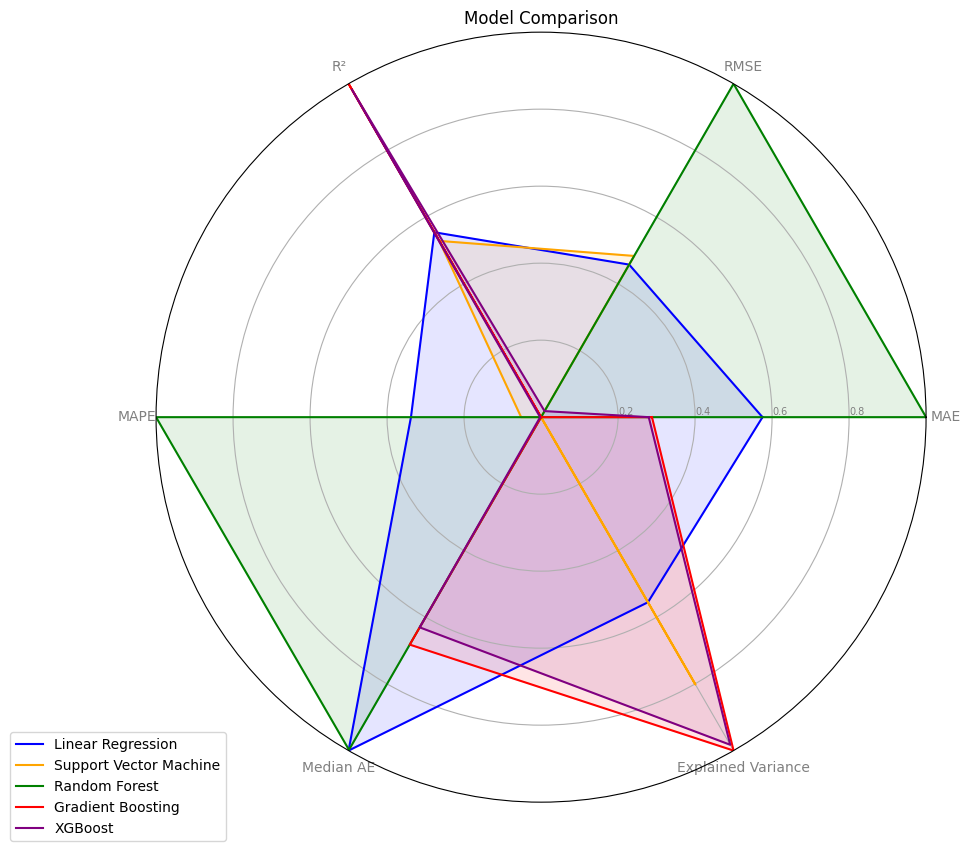

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Results Data
results = {
    "Linear Regression": {
        "MAE": 2.87209,
        "RMSE": 3.79237,
        "R²": 0.734264,
        "MAPE": 0.152853,
        "Median AE": 2.3676,
        "Explained Variance": 0.73431
    },
    "Support Vector Machine": {
        "MAE": 2.70399,
        "RMSE": 3.80201,
        "R²": 0.732912,
        "MAPE": 0.150013,
        "Median AE": 1.86525,
        "Explained Variance": 0.747182
    },
    "Random Forest": {
        "MAE": 2.99627,
        "RMSE": 3.9938,
        "R²": 0.705285,
        "MAPE": 0.159424,
        "Median AE": 2.3665,
        "Explained Variance": 0.705286
    },
    "Gradient Boosting": {
        "MAE": 2.78819,
        "RMSE": 3.62244,
        "R²": 0.757545,
        "MAPE": 0.149499,
        "Median AE": 2.20794,
        "Explained Variance": 0.757567
    },
    "XGBoost": {
        "MAE": 2.78575,
        "RMSE": 3.62919,
        "R²": 0.75664,
        "MAPE": 0.149523,
        "Median AE": 2.18195,
        "Explained Variance": 0.756659
    }
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Normalize the metrics for better visualization in the radar plot
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

normalized_results = results_df.apply(normalize)

# Create a radar plot
categories = list(normalized_results.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=10)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
plt.ylim(0, 1)

# Plot data
colors = ['b', 'orange', 'g', 'r', 'purple']
for i, model in enumerate(normalized_results.index):
    values = normalized_results.loc[model].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=model, color=colors[i])
    ax.fill(angles, values, color=colors[i], alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Model Comparison')
plt.show()
